In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath("..")))
from CS224W_Project import *

In [2]:
# https://stackoverflow.com/questions/35569042/ssl-certificate-verify-failed-with-python3
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [4]:
from torch_geometric_temporal.dataset import METRLADatasetLoader, PemsBayDatasetLoader

In [5]:
from CS224W_Project.src.utils.data_utils import *

## Set up

In [6]:
model = "dcrnn"
dataset = "pems"
df = TimeSeriesDataset(PemsBayDatasetLoader())

## Plot training losses (TODO: check why losses weren't saved properly)

In [10]:
losses = {
    mode: np.load(os.path.join(RESULTS_PATH, model, dataset, f"loss_{mode}.npy"))
    for mode in {"train", "valid"}
}

In [15]:
losses["train"]

array([0.65009991])

## Plot forecasts

In [14]:
y = torch.tensor(out["targets"][:32, :, :])
y_norm = df.scaler.normalize(y, feature_idx=0)

In [16]:
y[0, 0, :]

tensor([70.0000, 70.2000, 71.2000, 72.7000, 71.9000, 72.0000, 72.0000, 70.6000,
        70.7000, 71.8000, 69.1000, 69.5000])

In [17]:
df.scaler.unnormalize(y_norm, feature_idx=0)[0, 0, :]

tensor([70.0000, 70.2000, 71.2000, 72.7000, 71.9000, 72.0000, 72.0000, 70.6000,
        70.7000, 71.8000, 69.1000, 69.5000])

In [7]:
out = np.load(os.path.join(RESULTS_PATH, "forecasts", f"{model}_{dataset}.npz"))

In [8]:
out["targets"].shape, out["forecasts"].shape

((10417, 325, 12), (10417, 325, 12))

In [9]:
targets = np.concatenate((out["targets"][:, :, 0], out["targets"][-11:, :, -1]))
targets.shape

(10428, 325)

In [10]:
h = 1
node_idx = 0
forecasts = out["forecasts"][:, node_idx, h - 1]
forecasts.shape

(10417,)

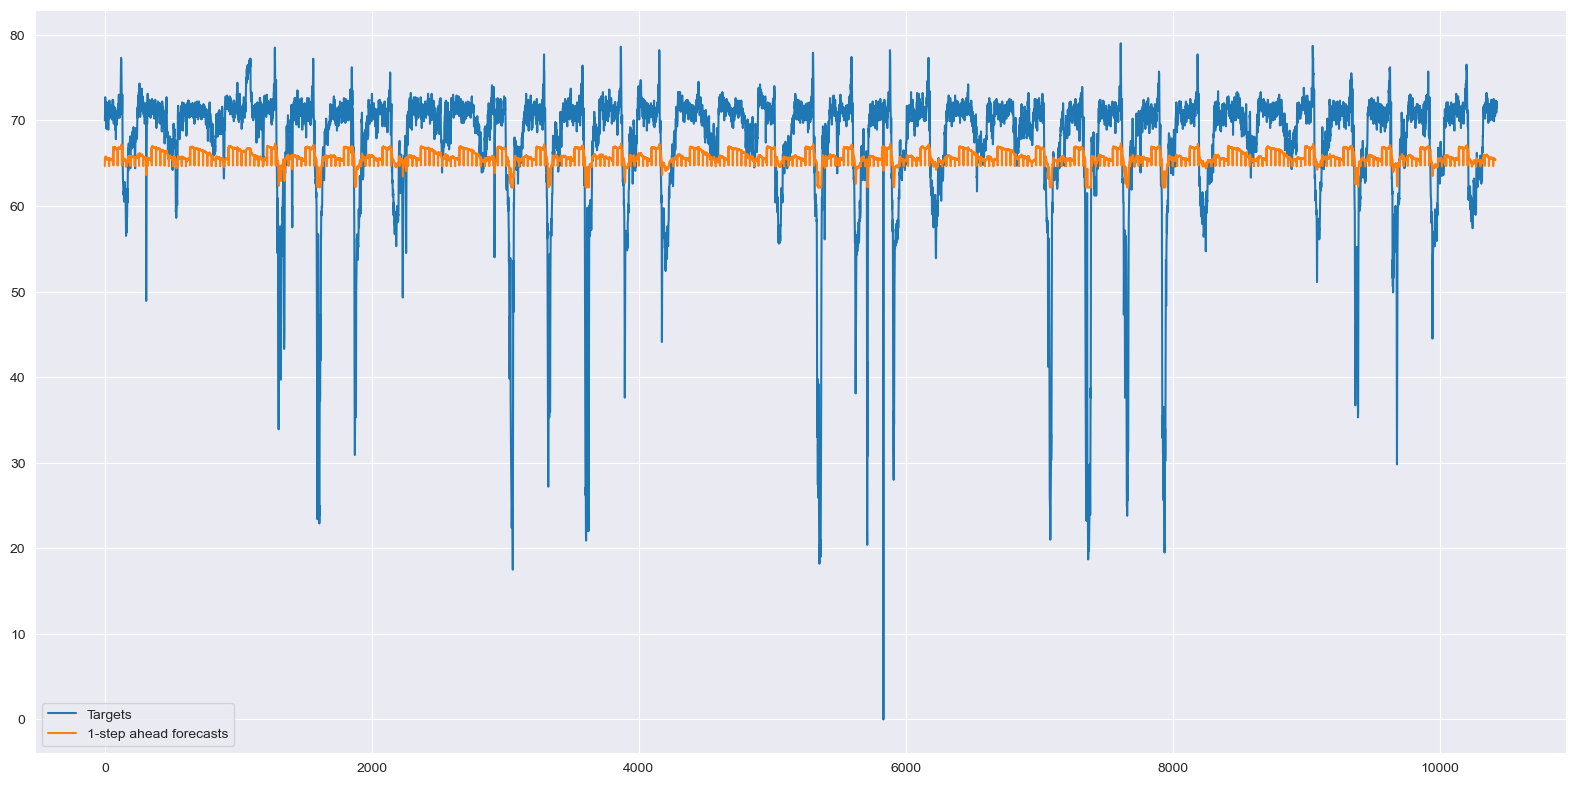

In [11]:
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
plt.tight_layout()
ax.plot(range(targets.shape[0]), targets[:, node_idx], label="Targets")
ax.plot(range(forecasts.shape[0]), forecasts, label=f"{h}-step ahead forecasts")
ax.legend(loc=3)

In [50]:
out["targets"][:, node_idx, h - 1][:12]

array([70. , 70.2, 71.2, 72.7, 71.9, 72. , 72. , 70.6, 70.7, 71.8, 69.1,
       69.5], dtype=float32)

In [ ]:
hs = (1, 3, 12)